# Unit 5 Homework: The Power of Plots

Your tasks are to do the following:
* Prepare the data.
* Generate summary statistics.
* Create bar charts and pie charts.
* Calculate quartiles, find outliers, and create a box plot.
* Create a line plot and a scatter plot.
* Calculate correlation and regression.
* Submit your final analysis.

## Final Analysis
Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

observation or interferences
1. 1
2. 2
3. 3

## Prepare the Data
1. Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames into a single DataFrame.

2. Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining step.

3. Display the updated number of unique mice IDs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
total_mice = df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = df["Mouse ID"].duplicated()
duplicate_IDTimepoint = df[df.duplicated(["Mouse ID", "Timepoint"])]
# duplicate_IDTimepoint = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_IDTimepoint
# duplicate_IDTimepoint.value_counts()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
## Optional: Get all the data for the duplicate mouse ID. 
# duplicatemice_df = df[df.duplicated(["Mouse ID"])]
g989 = df.loc[df["Mouse ID"] == "g989", :]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df.mask(duplicate_mice)["Mouse ID"].dropna()

# df1 = df.drop_duplicates(subset = "Mouse ID", keep = "first")

df1 = df.drop(df.index[df["Mouse ID"] == "g989"])
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
nondup_totalmice = df1["Mouse ID"].nunique()
nondup_totalmice

248

## Summary Statistics
Create two summary statistics DataFrames:
1. For the first table, use the groupby method to generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. This should result in five unique series objects. Combine these objects into a single summary statistics DataFrames.

2. For the second table, use the agg method to produce the same summary statistics table by using a single line of code.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties of each drug regimen of the tumor volume
regimen_gdf = df.groupby("Drug Regimen")
# regimen_gdf = df.set_index("Drug Regimen").groupby(["Drug Regimen"]

# mean
tumor_avg = regimen_gdf["Tumor Volume (mm3)"].mean()
# median
tumor_median = tumor_median = regimen_gdf["Tumor Volume (mm3)"].median()
# variance
tumor_var = regimen_gdf["Tumor Volume (mm3)"].var()
# standard deviation
tumor_sd = regimen_gdf["Tumor Volume (mm3)"].std()
# SEM - standard error of the mean
tumor_sem = regimen_gdf["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summarystats_df = pd.DataFrame({
    "Mean" : tumor_avg,
    "Median" : tumor_median,
    "Variance" : tumor_var,
    "Standard Deviation" : tumor_sd,
    "SEM" : tumor_sem,
})
# apply clean formatting
# summarystats_df.index.name = "Drug Regimen"
pd.options.display.float_format = "{:,.2f}".format
# print dataframe
summarystats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# regimen_df.describe()
# regimen_gdf["Tumor Volume (mm3)"].describe()
# df.groupby("Drug Regimen").agg

# summarystats2_df = regimen_gdf.agg(
#     Mean = ("Tumor Volume (mm3)", "mean"),
#     Median = ("Tumor Volume (mm3)", "median"),
#     Variance = ("Tumor Volume (mm3)", "var"), 
#     Standard_Deviation = ("Tumor Volume (mm3)", "std"), 
#     SEM = ("Tumor Volume (mm3)", "sem")
#     )

summarystats2_df = regimen_gdf["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"])
summarystats2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar & Pie Charts
1. Generate two bar plots. Both plots should be identical and show the total number of timepoints for all mice tested for each drug regimen throughout the course of the study.

2. Generate two pie plots. Both plots should be identical and show the distribution of female or male mice in the study.

In [10]:
df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

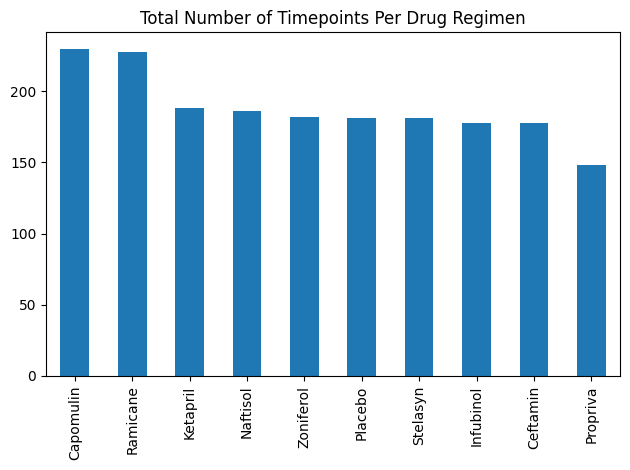

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create the first bar plot by using Pandas's `DataFrame.plot()` method.

# Timepoints_total = regimen_gdf["Timepoint"].value_counts()
# Timepoints_total.plot(
#     kind = "bar", 
#     figsize =(20,6),
#     title = "total number of timepoints for all mice tested for each drug regimen",
#     xlabel = "Drug Regimen Timepoints",
#     ylabel = "Total Number of Timepoints")
# plt.show()

timepoints = df1["Drug Regimen"].value_counts()

timepoints.plot(
    kind = "bar", 
    title = "Total Number of Timepoints Per Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Timepoints")
plt.tight_layout()
plt.show()

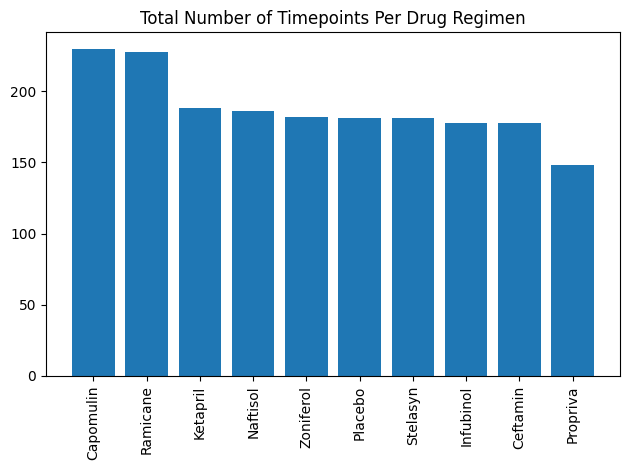

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create the second bar plot by using Matplotlib's `pyplot` methods.
x_axis = timepoints.index.values
y_axis = timepoints.values

plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)
plt.title("Total Number of Timepoints Per Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Timepoints")
plt.tight_layout()
plt.show()

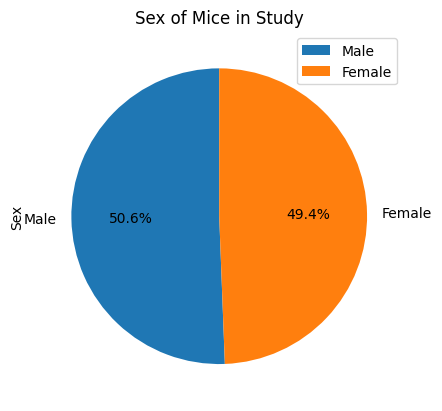

In [13]:
# Using Pandas, generate a pie plot showing the distribution of female versus male mice
sex_count = df["Sex"].value_counts()
sex_count.plot(
    kind = "pie",
    autopct = "%.1f%%", 
    title = "Sex of Mice in Study", 
    legend = "upper right",
    startangle = 90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


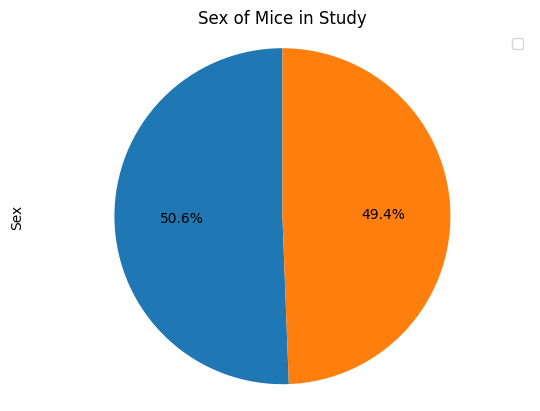

In [14]:
# Using pyplot, generate a pie plot showing the distribution of female versus male mice

# label = ["Male", "Female"]

plt.pie(sex_count, 
    autopct = "%.1f%%",
    startangle = 90,
    )
plt.legend()
plt.title("Sex of Mice in Study")
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc = "upper right")
plt.show()

## Quartiles, Outliers & Box Plots
1. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment regimens. Follow these substeps:
    * Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
    * Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data.
    * Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
    * Determine outliers by using the upper and lower bounds, and then print the results.
2. Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens. Highlight any potential outliers in the plot by changing their color and style.

**Hint**: 
All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = df1.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtimepoint_df = pd.DataFrame(max_timepoint)
df2 = pd.merge(df1, maxtimepoint_df, on = ("Mouse ID", "Timepoint"))
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.05,1
1,s185,Capomulin,Female,3,17,45,23.34,1
2,x401,Capomulin,Female,16,15,45,28.48,0
3,m601,Capomulin,Male,22,17,45,28.43,1
4,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.93,0
244,z435,Propriva,Female,12,26,10,48.71,0
245,z581,Infubinol,Female,24,25,45,62.75,3
246,z795,Naftisol,Female,13,29,45,65.74,3


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, row in df2.iterrows():
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if row["Drug Regimen"] == Drugs[0]:
        Capomulin.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == Drugs[1]:
        Ramicane.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == Drugs[2]:
        Infubinol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == Drugs[3]:
        Ceftamin.append(row["Tumor Volume (mm3)"])

Drugs_df = pd.DataFrame({
    "Capomulin": Capomulin,
    "Ramicane": Ramicane,
    "Infubinol": Infubinol,
    "Ceftamin": Ceftamin
})
print(Drugs_df)
    # add subset 

    # Determine outliers using upper and lower bounds
# Drugs_df.describe()
Drugs_max = Drugs_df.max()
Drugs_min = Drugs_df.min()

# quartiles = Drugs_df.quantile([.25,.5,.75])
# Q1 = quartiles[0.25]
# Q3 = quartiles[0.75]
# IQR = Q3 - Q1

# lower_bound = LQ - (1.5 * IQR)
# upper_bound = UQ + (1.5 * IQR)

# print(f"The lower quartile of tumor volume is: {Q1}")
# print(f"The upper quartile of tumor volume is: {Q3}")
# print(f"The interquartile range of tumor volume is: {IQR}")

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

    Capomulin  Ramicane  Infubinol  Ceftamin
0       23.34     22.05      67.97     63.00
1       28.48     29.13      65.53     45.00
2       28.43     30.28      57.03     56.06
3       30.49     30.56      66.08     55.74
4       31.02     30.64      72.23     48.72
5       31.90     31.56      36.32     47.78
6       32.38     31.10      60.97     61.85
7       33.33     33.40      62.44     68.92
8       34.46     32.98      60.92     67.75
9       37.31     33.56      67.29     57.92
10      36.04     36.13      66.20     46.78
11      37.07     38.81      62.12     59.85
12      38.85     37.23      47.01     64.30
13      38.94     36.37      60.17     59.74
14      38.98     36.56      55.63     61.43
15      38.75     37.31      45.70     64.19
16      38.13     38.34      54.66     45.00
17      39.95     38.41      55.65     52.93
18      40.66     40.66      46.25     45.00
19      40.16     40.67      54.05     67.53
20      40.73     45.22      51.54     45.00
21      41

TypeError: 'DataFrame' object is not callable

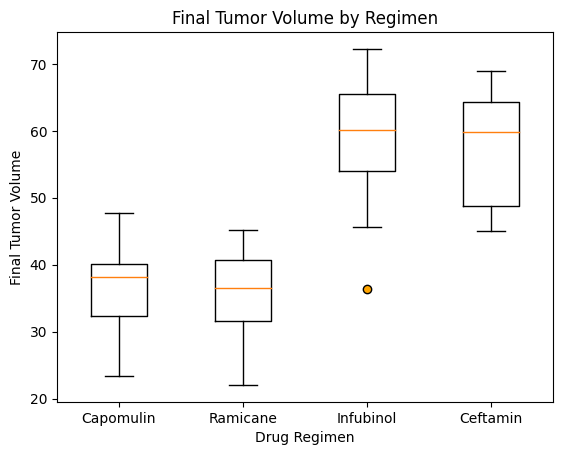

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [
    Drugs_df["Capomulin"], 
    Drugs_df["Ramicane"],
    Drugs_df["Infubinol"],
    Drugs_df["Ceftamin"]
    ]

fig1, ax1 = plt.subplots()
ax1.boxplot(
    boxplot,
    labels = Drugs,
    flierprops = {"markerfacecolor": 'orange'}
    )

ax1.set_title("Final Tumor Volume by Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume")

plt.show()

            **Infubinol has 1 outlier**

## Line & Scatter Plot
1. Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

2. Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.05,1
1,s185,Capomulin,Female,3,17,45,23.34,1
2,x401,Capomulin,Female,16,15,45,28.48,0
3,m601,Capomulin,Male,22,17,45,28.43,1
4,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.93,0
244,z435,Propriva,Female,12,26,10,48.71,0
245,z581,Infubinol,Female,24,25,45,62.75,3
246,z795,Naftisol,Female,13,29,45,65.74,3


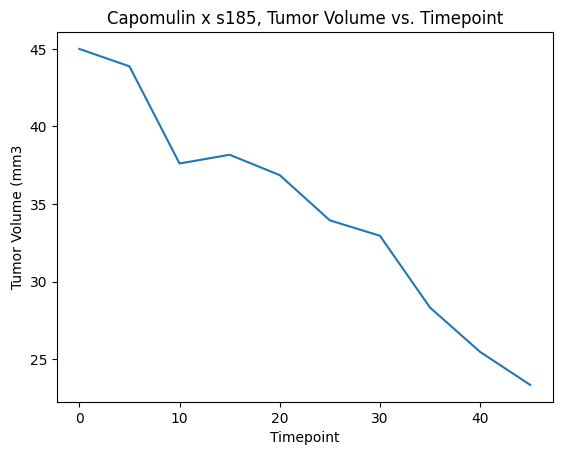

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = df1.loc[df1["Mouse ID"] == "s185"]

x_value = s185["Timepoint"]
y_value = s185["Tumor Volume (mm3)"]

plt.plot(xval, yval)
plt.title("Capomulin x s185, Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3")
plt.show()

/var/folders/js/0r32hc5j7rx3wbdjdr0mn1000000gn/T/ipykernel_32563/2857031187.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulins_avg = df1.loc[df1["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()


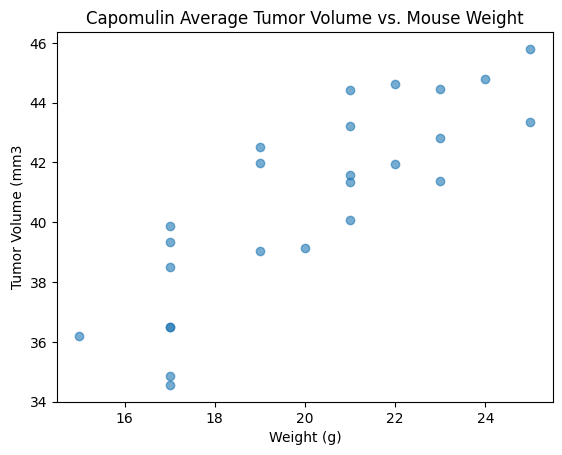

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulins_avg = df1.loc[df1["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()

x_val = Capomulins_avg["Weight (g)"]
y_val = Capomulins_avg["Tumor Volume (mm3)"]

plt.scatter(x_val, y_val, alpha = 0.6)
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3")
plt.show()

## Correlation & Regression
1. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.

2. Plot the linear regression model on top of the previous scatter plot.

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
